## IMPORTING SOME LIBRARIES

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

### IMPORTING DATASET

In [5]:
file = "C:/Users/IROANYA/Documents/DATA ANALYSIS FILES/Hamoye-Internship/STAGE C/Data_for_UCI_named.csv"
dt = pd.read_csv(file)
df = dt.copy()
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [6]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


((10000, 14), None)

In [7]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

#### CORRELATION

<AxesSubplot:>

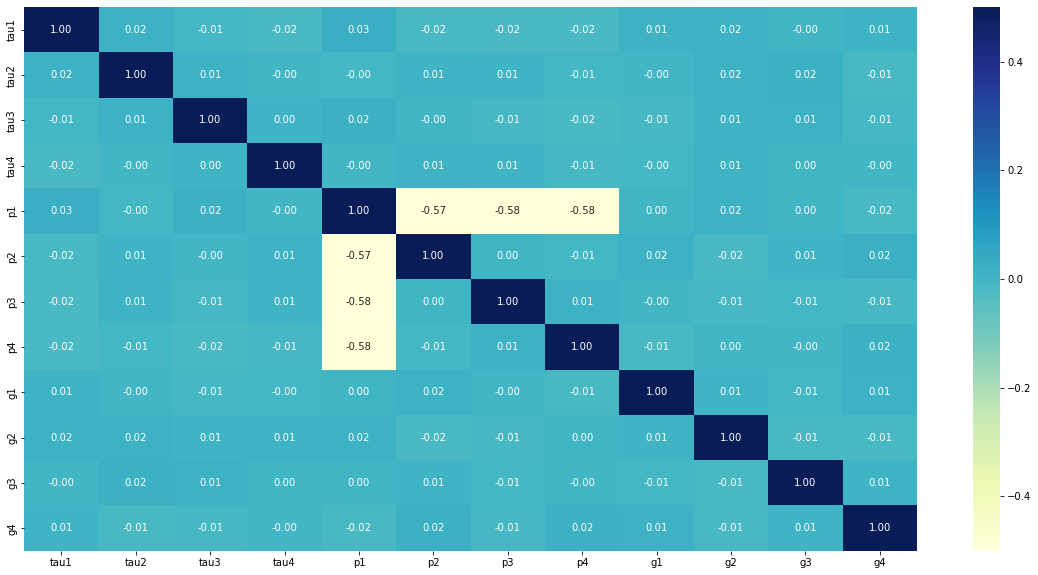

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.drop('stab', axis = 1).corr(), vmax=0.5, vmin=-0.5, annot=True, cmap="YlGnBu", fmt='.2f')

In [14]:
df = df.drop('stab', axis = 1)

In [16]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

### PICKING OUR X AND Y VARIABLES

In [39]:
xx = df.drop('stabf', axis = 1)
y = df['stabf']

#### SCALING OUR X VARIABLES

In [37]:
scaler = MinMaxScaler()

In [40]:
x = scaler.fit_transform(xx)
x = pd.DataFrame(x, columns=xx.columns)

#### SPLITTING

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=1)

In [43]:
x_train.shape, x_test.shape, y_train.shape,  y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [44]:
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

### AN IMBALANCE BETWEEN THE CLASSES(STABLE AND UNSTABLE) HENCE WE SMOTE

In [45]:
smote = SMOTE(random_state=1)

x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [46]:
y_train_smote.value_counts()

unstable    5092
stable      5092
Name: stabf, dtype: int64

#### THEY ARE NOW BALANCED

In [48]:
x_train.shape, x_train_smote.shape, x_test.shape

((8000, 12), (10184, 12), (2000, 12))

In [49]:
y_train.shape, y_train_smote.shape, y_test.shape

((8000,), (10184,), (2000,))

### USING XGBCLASSIFIER TO PREDICT CLASSES

In [51]:
xgbc = XGBClassifier(random_state = 1)

In [52]:
xgbc.fit(x_train_smote, y_train_smote)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['stable' 'unstable']

###### XGBCLASSIFIER REQUIRES THAT THE STABLE AND UNSTABLE BE ENCODED TO BINARY(0 & 1) HENCE IT COULD NOT PREDICT CLASSES

### USING LOGISTIC REGRESSION INSTEAD

In [74]:
log_reg = LogisticRegression()

In [75]:
log_reg.fit(x_train_smote, y_train_smote)

LogisticRegression()

In [76]:
y_pred = log_reg.predict(x_test)

In [77]:
log_df = pd.DataFrame({'actual': y_test,
                      'predicted': y_pred})
log_df

,actual,predicted
9953,unstable,unstable
3850,unstable,unstable
4962,stable,stable
3886,stable,stable
5437,unstable,unstable
...,...,...
3919,stable,stable
162,stable,stable
7903,stable,stable
2242,unstable,stable


#### ENCODING Y_TRAIN_SMOTE SO WE CAN USE XGBCLASSIFIER

In [65]:
encoder  = LabelEncoder()
y_train_encs = encoder.fit_transform(y_train_smote)

In [69]:
y_test_encs = encoder.fit_transform(y_test)

In [66]:
y_train_encs

array([1, 1, 1, ..., 0, 0, 0])

In [67]:
xgbc.fit(x_train_smote, y_train_enc)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [70]:
pred = xgbc.predict(x_test)

In [72]:
xg_df = pd.DataFrame({'actual': y_test_encs,
                     'predicted': pred})

In [73]:
xg_df
##where unstable = 1 & stable = 0

,actual,predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
1995,0,0
1996,0,0
1997,0,0
1998,1,1


### CONFUSION MATRIX, PRECISION, ACCURACY, F1-SCORE, RECALL CALCULATIONS

###### CONFUSION MATRIX

In [82]:
##xgb predictions

cnf_mat1 = confusion_matrix(y_test_encs, pred, labels = [0, 1])
cnf_mat1

array([[ 674,   38],
       [  63, 1225]], dtype=int64)

In [83]:
##log_reg predictions
cnf_mat2 = confusion_matrix(y_test, y_pred, labels = ['stable', 'unstable'])
cnf_mat2

array([[ 554,  158],
       [ 272, 1016]], dtype=int64)

###### PRECISION

In [87]:
##XGB
prec1 = round(precision_score(y_test_encs, pred, pos_label = 1) * 100, 2)
prec1

96.99

In [88]:
#log)reg
prec2 = round(precision_score(y_test, y_pred, pos_label='unstable') * 100, 2)
prec2

86.54

###### ACCURACY

In [90]:
#xgb
acc1 = round(accuracy_score(y_test_encs, pred) * 100, 2)
acc1

94.95

In [91]:
##log_reg
acc2 = round(accuracy_score(y_test, y_pred)* 100, 2)
acc2

78.5

###### RECALL

In [92]:
#xgb
rec1 = recall_score(y_test_encs, pred, pos_label=1)*100
round(rec1, 2)

95.11

In [93]:
##log_reg
rec2 = recall_score(y_test, y_pred, pos_label='unstable')*100
round(rec2, 2)

78.88

#### FROM THE METRICS WE CAN SEE THAT THE XGBCLASSIFIER  IS BEST SUITED FOR THE MODEL